In [1]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
#Data Loading
X_train = pd.read_csv("X_train.csv") 
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv") 

#### Building the model

In [3]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],))) 
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [4]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stop])

Epoch 1/50


90/90 [==============================] - 2s 5ms/step - loss: 143438.9844 - accuracy: 0.5375 - val_loss: 51537.8398 - val_accuracy: 0.5545
Epoch 2/50
90/90 [==============================] - 0s 2ms/step - loss: 36659.2461 - accuracy: 0.5479 - val_loss: 47460.6523 - val_accuracy: 0.6417
Epoch 3/50
90/90 [==============================] - 0s 2ms/step - loss: 27275.0938 - accuracy: 0.5330 - val_loss: 15135.2715 - val_accuracy: 0.5514
Epoch 4/50
90/90 [==============================] - 0s 2ms/step - loss: 20077.1191 - accuracy: 0.5347 - val_loss: 17373.2363 - val_accuracy: 0.4548
Epoch 5/50
90/90 [==============================] - 0s 1ms/step - loss: 13190.2373 - accuracy: 0.5368 - val_loss: 11362.9609 - val_accuracy: 0.5607
Epoch 6/50
90/90 [==============================] - 0s 1ms/step - loss: 16884.0488 - accuracy: 0.5427 - val_loss: 16357.7197 - val_accuracy: 0.4766
Epoch 7/50
90/90 [==============================] - 0s 2ms/step - loss: 15616.8447 - accuracy: 0.5319 - val_l

In [6]:
model.evaluate(X_train, y_train)


101/101 [==============================] - 0s 2ms/step - loss: 5450.2529 - accuracy: 0.6136


[5450.2529296875, 0.613558292388916]

In [7]:
model.evaluate(X_test, y_test)

34/34 [==============================] - 0s 2ms/step - loss: 6370.3979 - accuracy: 0.5843


[6370.39794921875, 0.584269642829895]

In [8]:
# Predict on the test set
y_pred_prob = model.predict(X_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC Score: {roc_auc}')

34/34 [==============================] - 0s 835us/step
ROC AUC Score: 0.49889595808383236


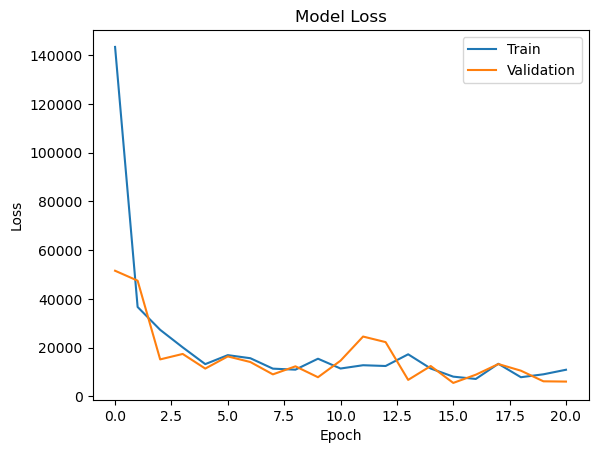

In [9]:
#plot the training and validation curve

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()